__Name/Section:__

A: Charles Ong/ MCHLRN-XX22

# Multinomial Logistic Regression Exercise

In this notebook, we will extend our `SGDClassifier` to train a multinomial dataset.

You will see that there is little difference between in generating a binomial logistic regression model from a multinomial logistic regression model in `scikit`.


## Instructions
* Read each cell and implement the TODOs sequentially. The markdown/text cells also contain instructions which you need to follow to get the whole notebook working.
* Do not change the variable names unless the instructor allows you to.
* Answer all the markdown/text cells with 'A: ' on them. The answer must strictly consume one line only.
* You are expected to search how to some functions work on the Internet or via the docs. 
* There are commented markdown cells that have crumbs. Do not delete them or separate them from the cell originally directly below it. 
* You may add new cells for "scrap work" as long as the crumbs are not separated from the cell below it.
* The notebooks will undergo a 'Restart and Run All' command, so make sure that your code is working properly.
* You are expected to understand the data set loading and processing separately from this class.
* You may not reproduce this notebook or share them to anyone.

## Import
Import **matplotlib**, **csv**, and **numpy**

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import csv

plt.style.use('ggplot')

%load_ext autoreload
%autoreload 2

# Synthetic Dataset

Let's use the `make_blobs()` function to create a dataset with 1650 instances centered in (-5, 0), (0, 0), and (-1, -4).

In [2]:
from sklearn.datasets import make_blobs

centers = [[-5, 0], [0, 0], [-1, -4]]

X, y = make_blobs(n_samples=1650, 
                  centers=centers, 
                  random_state=5)

Let's get the number of instances per class. Below are our classes and their corresponding colors in the graph later.
- class `0`, violet
- class `1`, turquoise
- class `2`, yellow

In [3]:
X_0 = X[y == 0]
X_1 = X[y == 1]
X_2 = X[y == 2]

print('Number of class 0:', len(X_0))
print('Number of class 1:', len(X_1))
print('Number of class 2:', len(X_2))

Number of class 0: 550
Number of class 1: 550
Number of class 2: 550


There are 550 instances for each class.

Let's divide the dataset into train and test set. The test set will contain 50 instances for each class.

In [4]:
np.random.seed(5)

# Select 50 `class 0` instances
selected_0 = np.random.choice(np.arange(len(X_0)),
                              size=50,
                              replace=False)

# Select 50 `class 1` instances
selected_1 = np.random.choice(np.arange(len(X_1)),
                              size=50,
                              replace=False)

# Select 50 `class 2` instances
selected_2 = np.random.choice(np.arange(len(X_2)),
                              size=50,
                              replace=False)

# Form the test set
X_test = np.concatenate((X_0[selected_0],
                         X_1[selected_1],
                         X_2[selected_2]))
y_test = np.concatenate((np.array([0 for _ in range(50)]),
                         np.array([1 for _ in range(50)]),
                         np.array([2 for _ in range(50)])))

print(X_test.shape)
print(y_test.shape)

(150, 2)
(150,)


The remaining 1500 instances will be a part of the train set, where each class has 500 instances.

In [5]:
X_train = np.concatenate((np.delete(X_0, selected_0, 0),
                          np.delete(X_1, selected_1, 0),
                          np.delete(X_2, selected_2, 0)))
y_train = np.concatenate((np.array([0 for _ in range(500)]),
                          np.array([1 for _ in range(500)]),
                          np.array([2 for _ in range(500)])))

print(X_train.shape)
print(y_train.shape)

(1500, 2)
(1500,)


Visualize the train data.

Text(0.5, 1.0, 'Train data')

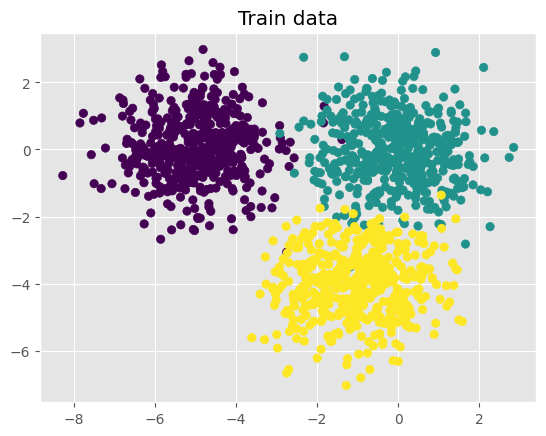

In [6]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.title('Train data')

Visualize the test data.

Text(0.5, 1.0, 'Test data')

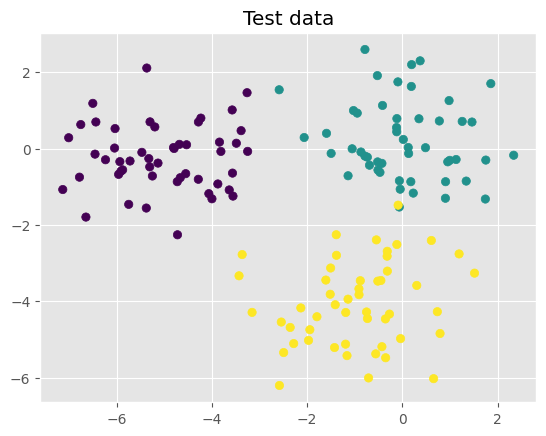

In [7]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.title('Test data')

**Sanity check:** You should have a similar graph like our training data, but now with fewer points. The colors should appear in the same area, too.

This is the data which we will feed into our multinomial logistic regression model.

## Multinomial Logistic Regression

Use `sklearn`'s `SGDClassifier` to create a logistic regression model. Since we have three classes (`Class 0`, `Class 1`, and `Class 2`), we will be implementing a multinomial logistic regression.

Import the `SGDClassifier` class.

In [8]:
from sklearn.linear_model import SGDClassifier

Instantiate an `SGDClassifier` object. Set the following hyperparameters:
- Loss function: 'log_loss'
- Initial learning rate: 0.0001
- Learning rate: 'constant'
- Random state: 5
- Verbose: 0

See the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html).

In [9]:
# Write your code here
model = SGDClassifier(loss='log_loss', eta0=0.0001, learning_rate='constant', random_state=5, verbose=0)

Set the maximum number of epochs to 200.

In [10]:
max_epochs = 200

## Using the `DataLoader` class to train via mini-batch gradient descent

We will train the model using mini-batch gradient descent. 

Use the `data_loader.py` file that we implemented in the previous notebook. Import the `DataLoader` class.

In [11]:
from data_loader import DataLoader

Instantiate an `DataLoader` object. Pass the `X` and `y` of the train set and `20` as our `batch_size`.

In [12]:
# Write your code here
data_loader = DataLoader(X=X_train, y=y_train, batch_size=20)

Train your model. Complete the code below.

In [13]:
from sklearn.metrics import log_loss

e = 0
is_converged = False
previous_loss = 0
labels = np.unique(y_train)


gradient_records = []
# For each epoch
while e < max_epochs and is_converged is not True:
    
    loss = 0
    
    # TODO: Get the batch for this epoch.
    X_batch, y_batch = data_loader.get_batch()
    
    # For each batch
    for X, y in zip(X_batch, y_batch):
        
        # TODO: Partial fit the model to the subset you selected
        # In partial fit, you have to pass a classes parameters, use labels as the value
        model.partial_fit(X=X, y=y, classes=labels)
        
        # Compute the loss
        y_pred = model.predict_proba(X_train)
        loss += log_loss(y_train, y_pred)
        
    # Display the average loss per epoch
    print('Epoch:', e + 1, '\tLoss:', (loss / len(X_batch)))

    gradient_records.append([e+1, loss / len(X_batch)])
    
    if abs(previous_loss - loss) < 0.05:
        is_converged = True
    else:
        previous_loss = loss
        e += 1

Epoch: 1 	Loss: 1.008010635391808
Epoch: 2 	Loss: 0.8726098043603937
Epoch: 3 	Loss: 0.7813091494933508
Epoch: 4 	Loss: 0.7184207058311284
Epoch: 5 	Loss: 0.6721144484277192
Epoch: 6 	Loss: 0.6371323628030219
Epoch: 7 	Loss: 0.6092002783840539
Epoch: 8 	Loss: 0.5864620051525502
Epoch: 9 	Loss: 0.5676719210804895
Epoch: 10 	Loss: 0.5514974073222306
Epoch: 11 	Loss: 0.5377300902127541
Epoch: 12 	Loss: 0.5255276502565202
Epoch: 13 	Loss: 0.5145861026482698
Epoch: 14 	Loss: 0.5049036502056883
Epoch: 15 	Loss: 0.4959525750203387
Epoch: 16 	Loss: 0.48776354492034596
Epoch: 17 	Loss: 0.48022983602070374
Epoch: 18 	Loss: 0.4732402295686269
Epoch: 19 	Loss: 0.466643722151946
Epoch: 20 	Loss: 0.46044676578533833
Epoch: 21 	Loss: 0.45466344478529824
Epoch: 22 	Loss: 0.44918403491543046
Epoch: 23 	Loss: 0.44392350484367027
Epoch: 24 	Loss: 0.4389908283937705
Epoch: 25 	Loss: 0.434134062091656
Epoch: 26 	Loss: 0.429572651101646
Epoch: 27 	Loss: 0.42515217663204036
Epoch: 28 	Loss: 0.420898346557814

**Question #1:** How many epochs did the model train before convergence?

<!--crumb;qna;Q1-->

In [14]:
print(f'A: {gradient_records[-1][0]} epochs')

A: 154 epochs


**Question #2:** What is the average loss at the last epoch? Limit to 4 decimal places.

<!--crumb;qna;Q2-->

In [15]:
print(f'A: {gradient_records[-1][1]:.4f} loss')

A: 0.2240 loss


## Try our trained model on the test data

Now, let's get the prediction results on the test data to see if our model can handle unseen instances. Store the predicted labels in the variable `predictions`.

In [16]:
# Write your code here
predictions = model.predict(X_test)

Print the predictions.

In [17]:
print(predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 0 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Compare the ground truth labels with the predicted labels. Store the total number of correct predictions in the variable `num_correct`.

In [18]:
# Write your code here
num_correct = np.sum(predictions == y_test)

Print the number of correct predictions.

In [19]:
print(num_correct)

147


Compute for the accuracy. Store the accuracy in the variable `accuracy`.

In [20]:
# Write your code here
accuracy = num_correct / len(y_test)

Print the accuracy.

In [21]:
print(accuracy)

0.98


**Question #3:** What is the accuracy of the model when evaluated on the test set? Express your answer in a floating point number from 0 to 1. Limit to 4 decimal places.

<!--crumb;qna;Q3-->

In [22]:
print('A:')
print(f'Accuracy: {accuracy:.4f}')
print(f'Score: {model.score(X_test, y_test):.4f}')

A:
Accuracy: 0.9800
Score: 0.9800


Print out the probabilities of each instance in the test set belonging to all of the 3 classes.

In [23]:
# Write your code here
from pandas import DataFrame
probabilities = DataFrame(model.predict_proba(X_test), columns=['Class 0', 'Class 1', 'Class 2'])
probabilities['Total Probability'] = probabilities.sum(axis='columns')
probabilities

,Class 0,Class 1,Class 2,Total Probability
0,0.913651,0.077696,0.008653,1.0
1,0.863023,0.018826,0.118151,1.0
2,0.982970,0.006534,0.010495,1.0
3,0.968480,0.010947,0.020573,1.0
4,0.988159,0.008271,0.003570,1.0
...,...,...,...,...
145,0.010828,0.030761,0.958411,1.0
146,0.019842,0.169481,0.810677,1.0
147,0.052069,0.029029,0.918901,1.0
148,0.002812,0.006124,0.991064,1.0


**Sanity check:** The sum probability of each instance should all be equal to one (you should see a vector of length 100 all containing 1s). The probabilities should be a (100, 3) matrix. Each row signifies a test instance and the columns represent the probability of a class.

In [24]:
print(model.coef_)

[[-1.07536672  0.76188127]
 [ 1.09326295  0.97895125]
 [ 0.43117002 -1.33838929]]


Previously, in the binomial logistic regression, your weights will have a shape of `(1, num_features)`, where `num_features` is the number of features in the dataset.

In this multinomial logistic regression problem, your weights/coefficients have a `(3, num_features)` shape, where `num_features` in this particular example is 2. You can confirm this by checking the shape of the weights.

**Question #4:** What does it mean to have a 3 rows of weights in multinomial logistic regression? Why is it different from the binomial logistic regression weight shape?

<!--crumb;qna;Q4-->

A: The first shape element (rows) refers to the number of classes. Each class will have its own row of feature weights.

The second element (columns) refers to the feature weights. Our data has 2 features hence we see 2 columns.

The main difference between binomial and multinomial is with the rows. Binomial only has 1 row since it only needs to know the weight and prediction for 1 class. Whatever prediction it reaches, the opposite can be assumed --**If not ClassA, then is ClassB**--. Hence 1 row is able to work.

Multinomials on the other hand can't simply provide binary answers since we work on data with >= 3 classes, which is where the difference in row numbers is important.

## Visualizing our model prediction boundaries

To see the prediction boundary, we will predict each possible point on our feature space.

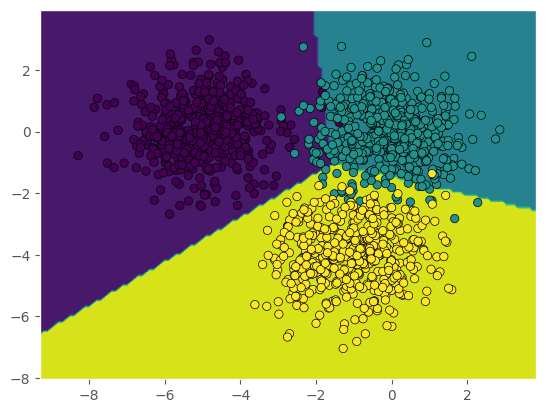

In [25]:
x_min, x_max = X_train[:,0].min() - 1, X_train[:,0].max() + 1
y_min, y_max = X_train[:,1].min() - 1, X_train[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))


x_test = np.squeeze(np.stack((xx.ravel(),yy.ravel()))).T
Z = model.predict(x_test)

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='black')

**Question #5:** Some of the instances of other classes are found in the regions of other classes. For example, some cyan dots are found in the violet and yellow regions. Does this indicate that our model is not trained correctly? Explain your answer.

<!--crumb;qna;Q5-->

A: No, not necessarily.

1. A properly trained model is one that fits just right. It doesn't overgeneralize or overfit. It should be able to properly separate classes by selecting ideal boundaries.

2. Noise will always be present. There will always be classes that may present themselves inside different class blobs. Accounting for these noise/outliers will create overfitting instead.

# Iris Dataset
We will use the Iris dataset as our dataset. Each instance represents an Iris flower using 4 distinct features:
- `sepal_length` - length of the sepal in centimeters
- `sepal_width` - width of the sepal in centimeters
- `petal_length` - length of the petal in centimeters
- `petal_width` - width of the petal in centimeters

Iris flowers can be 3 divided into different classes, which are:
- `Iris-setosa` - class `0`
- `Iris-versicolor` - class `1`
- `Iris-virginica` - class `2`

Let's load `Iris.csv`.

In [26]:
classes = {
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica': 2
}

with open('Iris.csv', 'r') as csv_file:
    raw_data = csv.reader(csv_file)
    X_iris = np.empty((0, 4), float)
    y_iris = np.empty((0, 1), int)
    for row in raw_data:
        X_iris = np.vstack([X_iris, np.array([float(row[0]),     # column for sepal_length
                                              float(row[1]),     # column for sepal_width
                                              float(row[2]),     # column for petal_length
                                              float(row[3])])])  # column for petal_width
        
        y_iris = np.append(y_iris, np.array([classes[row[4]]]))  # column for class

# This transforms the vector of length N into a matrix with shape (N, 1)
y_house = np.expand_dims(y_iris, 1) 

print('Training data shape:', X_iris.shape)
print('Ground truth values shape:', y_iris.shape)

Training data shape: (150, 4)
Ground truth values shape: (150,)


**Question #6:** How many instances do we have?

<!--crumb;qna;Q6-->

In [27]:
print(f'A: {len(y_iris)} instances') 

A: 150 instances


Let's get the number of instances per class.

In [28]:
X_iris_0 = X_iris[y_iris == 0]
X_iris_1 = X_iris[y_iris == 1]
X_iris_2 = X_iris[y_iris == 2]

print('Number of class 0:', len(X_iris_0))
print('Number of class 1:', len(X_iris_1))
print('Number of class 2:', len(X_iris_2))

Number of class 0: 50
Number of class 1: 50
Number of class 2: 50


There are 50 instances for each class.

Let's divide the dataset into train and test set. The test set will contain 10 instances for each class.

In [29]:
np.random.seed(5)

# Select 10 `class 0` instances
selected_0 = np.random.choice(np.arange(len(X_iris_0)),
                              size=10,
                              replace=False)

# Select 10 `class 1` instances
selected_1 = np.random.choice(np.arange(len(X_iris_1)),
                              size=10,
                              replace=False)

# Select 10 `class 2` instances
selected_2 = np.random.choice(np.arange(len(X_iris_2)),
                              size=10,
                              replace=False)

# Form the test set
X_test = np.concatenate((X_iris_0[selected_0],
                         X_iris_1[selected_1],
                         X_iris_2[selected_2]))
y_test = np.concatenate((np.array([0 for _ in range(10)]),
                         np.array([1 for _ in range(10)]),
                         np.array([2 for _ in range(10)])))

print(X_test.shape)
print(y_test.shape)

(30, 4)
(30,)


The remaining 120 instances will be a part of the train set, where each class has 40 instances.

In [30]:
print(f' Old X_train: {X_train.shape}')

X_train = np.concatenate((np.delete(X_iris_0, selected_0, 0),
                          np.delete(X_iris_1, selected_1, 0),
                          np.delete(X_iris_2, selected_2, 0)))
y_train = np.concatenate((np.array([0 for _ in range(40)]),
                          np.array([1 for _ in range(40)]),
                          np.array([2 for _ in range(40)])))

print(f' New X_train: {X_train.shape}')

# print(X_train.shape)
print(y_train.shape)

 Old X_train: (1500, 2)
 New X_train: (120, 4)
(120,)


## Multinomial Logistic Regression

Use `sklearn`'s `SGDClassifier` to create a logistic regression model. Since we have three classes (`Iris-setosa`, `Iris-versicolor`, and `Iris-virginica`), we will be implementing a multinomial logistic regression.

Instantiate an `SGDClassifier` object. Set the following hyperparameters:
- Loss function: 'log_loss'
- Initial learning rate: 0.01
- Learning rate: 'constant'
- Random state: 5
- Verbose: 0

See the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html).

In [31]:
# Write your code here
model = SGDClassifier(loss='log_loss', eta0=0.01, learning_rate='constant', random_state=5, verbose=0)

Set the maximum number of epochs to 200.

In [32]:
max_epochs = 200

## Using the `DataLoader` class to train via mini-batch gradient descent

We will train the model using mini-batch gradient descent. 

Instantiate a `DataLoader` object. Pass the `X` and `y` of the train set and `5` as our `batch_size`.

In [33]:
# Write your code here
iris_data_loader = DataLoader(X=X_train, y=y_train, batch_size=5)

In [34]:
print(X_train.shape)

(120, 4)


Train your model. Complete the code below.

In [35]:
e = 0
is_converged = False
previous_loss = 0
labels = np.unique(y_iris)


iris_gradient_res = []
# For each epoch
while e < max_epochs and is_converged is not True:
    
    loss = 0
    
    # TODO: Get the batch for this epoch.
    X_batch, y_batch = iris_data_loader.get_batch()
    
    # For each batch
    for X, y in zip(X_batch, y_batch):
        
        # TODO: Partial fit the model to the subset you selected
        # In partial fit, you have to pass a classes parameters, use labels as the value
        model.partial_fit(X=X, y=y, classes=labels)


        assert False
        # Compute the loss
        y_pred = model.predict_proba(X_train)
        loss += log_loss(y_train, y_pred)
        
    # Display the average loss per epoch
    print('Epoch:', e + 1, '\tLoss:', (loss / len(X_batch)))

    iris_gradient_res.append([e+1, loss / len(X_batch)])
    if abs(previous_loss - loss) < 0.05:
        is_converged = True
    else:
        previous_loss = loss
        e += 1

AssertionError: 

**Question #7:** How many epochs did the model train before convergence?

<!--crumb;qna;Q7-->

In [ ]:
print(f'A: {iris_gradient_res[-1][0]} epochs') 

**Question #8:** What is the average loss at the last epoch? Limit to 4 decimal places.

<!--crumb;qna;Q8-->

In [ ]:
print(f'A: {iris_gradient_res[-1][1]:.4f} loss') 

## Try our trained model on the test data

Now, let's get the prediction results on the test data to see if our model can handle unseen instances. Store the predicted labels in the variable `predictions`.

In [ ]:
# Write your code here
predictions = model.predict(X_test)

Print the predictions.

In [ ]:
print(predictions)

Compare the ground truth labels with the predicted labels. Store the total number of correct predictions in the variable `num_correct`.

In [ ]:
# Write your code here
num_correct = np.sum(predictions == y_test)

Print the number of correct predictions.

In [ ]:
print(num_correct)

Compute for the accuracy. Store the accuracy in the variable `accuracy`.

In [ ]:
# Write your code here
accuracy = num_correct / len(y_test)

Print the accuracy

In [ ]:
print(accuracy)

**Question #9:** What is the accuracy of the model when evaluated on the test set? Express your answer in a floating point number from 0 to 1. Limit to 4 decimal places.

<!--crumb;qna;Q9-->

In [ ]:
print('A:')
print(f'Accuracy: {accuracy:.4f}')
print(f'Score: {model.score(X_test, y_test):.4f}')

## Test your model with your own input feature

In [ ]:
classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

print('Enter the sepal_length:')
f1 = float(input())

print('Enter the sepal_width:')
f2 = float(input())

print('Enter the petal_length:')
f3 = float(input())

print('Enter the petal_width:')
f4 = float(input())

pred = np.squeeze(model.predict([[f1, f2, f3, f4]]))

print('The class is', classes[pred])

# Conclusion

Congratulations, you made it this far! We've been able to generate data, classify them using our logistic regression model, and see how it performs.

Go ahead and try placing the centers nearer each other to see if our model can still handle more complex data, just remember to place them back before submission.

Now, we have a machine learning algorithm that can classify an instance into multiple classes. We also have the probability of an instance belonging to each of the class. This allows us to put a threshold on the probability (e.g. if the highest probability on an instance is 35%, we can say 'we are not sure' instead of giving a prediction; but if the highest probability is 90%, we can confidently claim our prediction)

It is important that you know and understand logistic regression because these will be the building blocks of our next topic: neural networks. 

### <center>fin</center>

<!-- DO NOT MODIFY OR DELETE THIS -->
<sup>made/compiled by daniel stanley tan & courtney anne ngo 🐰 & thomas james tiam-lee</sup> <br>
<sup>for comments, corrections, suggestions, please email:</sup><sup> danieltan07@gmail.com & courtneyngo@gmail.com & thomasjamestiamlee@gmail.com</sup><br>
<sup>please cc your instructor, too</sup>
<!-- DO NOT MODIFY OR DELETE THIS -->